<a href="https://www.kaggle.com/code/ellekayem/data-visualization-with-the-glue-dataset?scriptVersionId=128245619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Visualization

### Analysis by Lauren Main

### Feature Tasks Version 1.0

Using two datasets load and analyze the data.

Summarize your insights. 

Visualize your insights with at least two illustrations per set. 



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
glue = sns.load_dataset("glue")
glue

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


## First Look at the Glue data

All of the following information researched by Lauren Main. 


In my intial exploration of the dataset, I set up a categorical plot.  Right away, I noticed that there were some interesting missing pieces in the data.

For example, in 2017 the Transformer did not record any scores.

This was mirrored in 2019 as the LSTM did not record any scores. 

In the progression of artificial neural networks, does this reflect progress within the models? 

How are the models scores changing over the 3 year's worth of data collected and is the encoder a signifcant factor in the scores? 

Note: in my research I discovered that LSTM (introduced in 1997) stands for Long Short-Term Memory, which is AI used in deep learning. It is especially targted at natural language processing because it can maintain a long-term memory of previous inputs and the relationships between those inputs.

LSTM is implemented by memory cells and gates that regulate the flow of information. The gates can either allow or block information from entering or leaving the memory cells, depending on their importance to the network's output. This enables LSTMs to selectively remember or forget information from previous inputs, allowing them to handle long-term dependencies more effectively.

Developing and implementing LSTM has been in progress since the 2000s. 

Additionally, the Transformer type of encoder was developed and implemented in 2017, also focused on natural language processing. 

It is implemented by self-attention and feedforward neural network. Self-attention is a mechanism that allows the model to weigh the importance of different positions in the input sequence when encoding it. It computes a weighted sum of the inputs, where the weights are learned based on the similarity between each position and all other positions in the sequence. 

The Transformer encoder is designed to be highly parallelizable, which makes it efficient to train on large-scale datasets.

Note on the models in this dataset: 

+ ERNIE; Enhanced Representation through Knowledge Integration, developed by Baidu

+ T5; Text-to-Text Transfer Transformer (and not Terminator, haha), developed by Google

+ RoBERTa; Robustly Optimized BERT Pretraining Approach; based on BERT and developed by Facebook AI

+ BERT; Bidirectional Encoder Representations from Transformers; developed by Google

+ BiLSTM+ELMo; Bidirectional Long Short-Term Memory with ELMo

+ BiLSTM; Bidirectional Long Short-Term Memory

+ BiLSTM+CoVe; Contextualized Word Embeddings

+ BiLSTM+Attn; Bidirectional LSTM with Attention


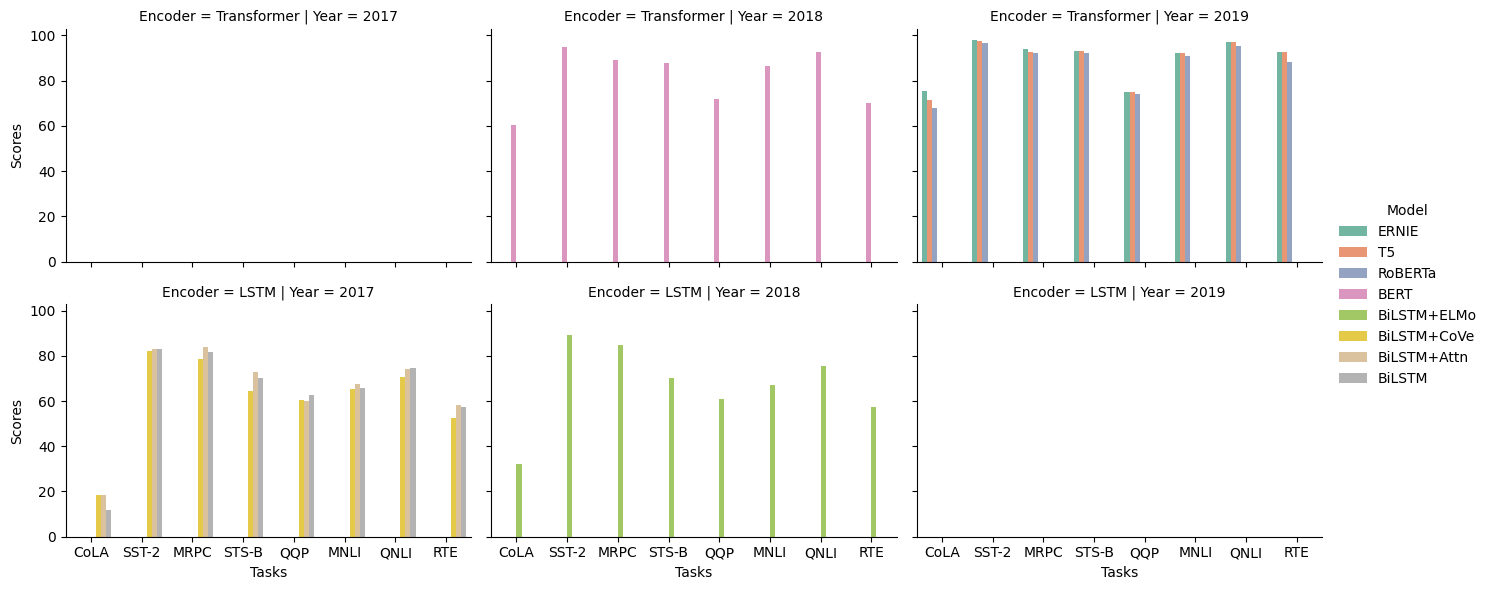

In [3]:
glue_df = sns.catplot(
data= glue,
kind = 'bar',
x = 'Task',
y ='Score',
hue = 'Model',
col = 'Year',
row = 'Encoder',
height=3,
aspect = 1.5,
palette='Set2')

glue_df.set_axis_labels('Tasks', 'Scores')
glue_df

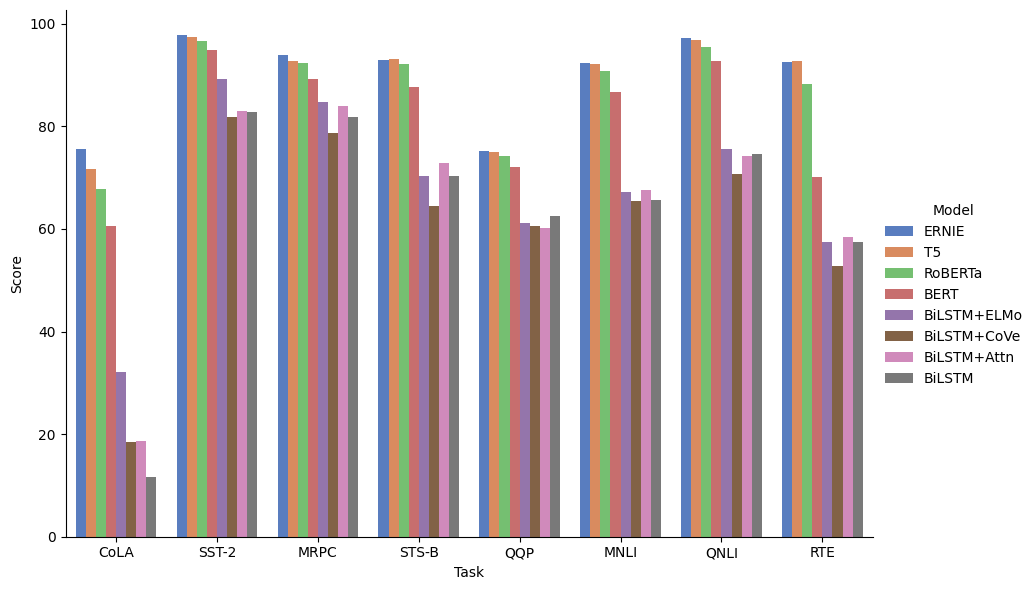

In [4]:
sns.catplot(
    data=glue,
    x='Task',
    y='Score',
    kind='bar',
   errorbar=None,
    estimator='mean',
    palette='muted',
    hue='Model',
    height=6,
    aspect=1.5
)
sns.despine()

## First Conclusions

At the start of this dataset, the Transformer encoder is not being used.  However, later on LSTM is not being used and the Transformer encoder is being used by most models. The 2018 dataset is only represented by two models, each using different encoders. 

## Additional Insights

While the above illustration helps us understand more about what the data looks like, it would be more interesting to see the trend of the model's scores in each task. In the time of ChatGPT, let's check out the data from 4 years ago.

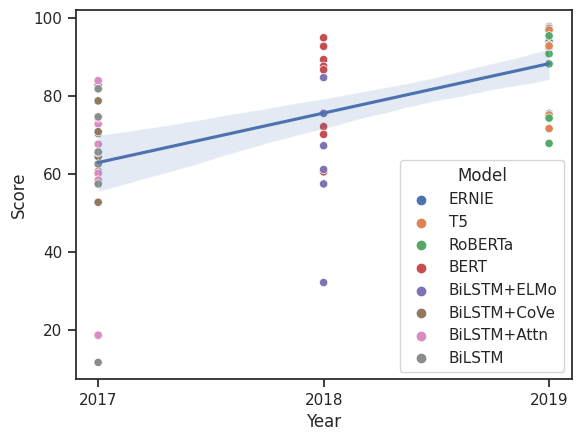

In [5]:
sns.set_theme(style="ticks")

# Create scatter plot
scatter_plot = sns.scatterplot(data=glue, x="Year", y="Score", hue="Model")

# Add regression line
sns.regplot(data=glue, x="Year", y="Score", scatter=False)

# Set the x-axis tick labels to display integers
scatter_plot.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))



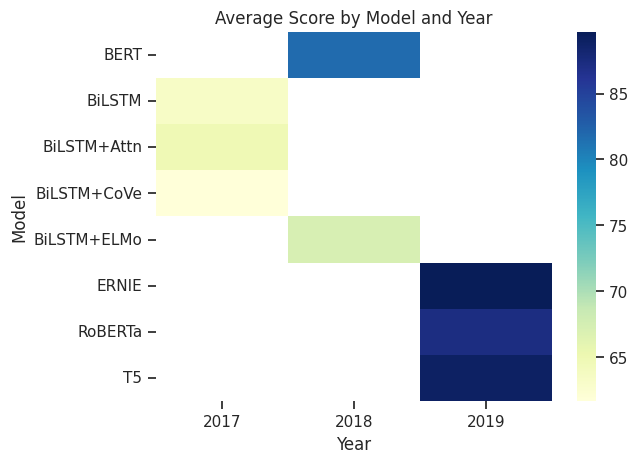

In [6]:
# Create a pivot table with the mean of the score for each model and year combination
pivot_table = glue.pivot_table(values='Score', index='Model', columns='Year', aggfunc='mean')

# Create the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')

# Add a title
plt.title('Average Score by Model and Year')

# Show the plot
plt.show()